### Intro ANN

- Review `numpy` and `pytorch`
- Perceptron with `numpy` and `pytorch`
- Training a basic network with `pytorch`

In [593]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

### Derivatives and Gradients for Optimization

Consider:

$$f(x) = x^2$$

The big idea is that we can use the tangent line at a point to approximate the function itself.  Thus, we walk on the tangent line in the negative direction of the slope. If we take small enough steps and readjust each iteration we should find ourselves at the bottom of the graph.

$$x_n = x_{n-1} - \alpha f'(x_{n-1})$$

Start at the point $(1, 1)$ and note that the slope of the tangent line is $f'(1) = 2*1 = 2$.

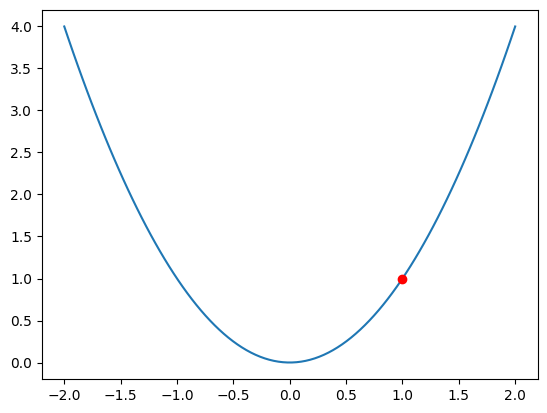

In [594]:
def f(x): return x**2
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x))
plt.plot(1, 1, 'ro')

In [595]:
#start - step * slope
1 - .1*(2*1)

0.8

In [596]:
#next step
.8 - .1*(2*.8)

0.64

**PROBLEM**

Complete the loop below, updating the list `xs` with each iteration of gradient descent.

In [597]:
xs = [1]
for i in range(10):
  pass

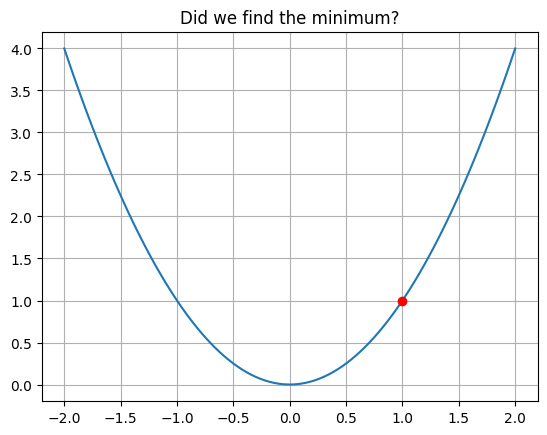

In [598]:
xs = np.array(xs)
plt.plot(x, f(x))
plt.plot(xs, f(xs), 'ro')
plt.title('Did we find the minimum?')
plt.grid();

### Introduction to Artificial Neural Networks

For the examples in our class, we will use the `pytorch` library for modeling with neural networks.  The important object here is the `tensor` object, similar to the `numpy.array` but with some extra gradient functionality.

- [Pytorch Docs](https://pytorch.org/)
- [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch-second-edition)

[Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.72721&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [599]:
import torch
import torch.nn as nn
import torch.optim as optim

In [600]:
xt = torch.tensor(x, dtype = torch.float32)
yt = torch.tensor(f(x), dtype = torch.float32)

In [601]:
loss_fn = nn.MSELoss()

In [602]:
def model(x, w, b):
  return w*x**2 + b

In [603]:
w = torch.ones((), requires_grad=True)
b = torch.ones((), requires_grad=True)

In [604]:
model(xt, w, b)

tensor([5.0000, 4.8400, 4.6833, 4.5298, 4.3797, 4.2327, 4.0891, 3.9487, 3.8115,
        3.6777, 3.5471, 3.4198, 3.2957, 3.1749, 3.0573, 2.9431, 2.8321, 2.7243,
        2.6198, 2.5186, 2.4207, 2.3260, 2.2346, 2.1464, 2.0615, 1.9799, 1.9015,
        1.8264, 1.7546, 1.6861, 1.6208, 1.5587, 1.4999, 1.4444, 1.3922, 1.3432,
        1.2975, 1.2551, 1.2159, 1.1800, 1.1473, 1.1179, 1.0918, 1.0690, 1.0494,
        1.0331, 1.0200, 1.0102, 1.0037, 1.0004, 1.0004, 1.0037, 1.0102, 1.0200,
        1.0331, 1.0494, 1.0690, 1.0918, 1.1179, 1.1473, 1.1800, 1.2159, 1.2551,
        1.2975, 1.3432, 1.3922, 1.4444, 1.4999, 1.5587, 1.6208, 1.6861, 1.7546,
        1.8264, 1.9015, 1.9799, 2.0615, 2.1464, 2.2346, 2.3260, 2.4207, 2.5186,
        2.6198, 2.7243, 2.8321, 2.9431, 3.0573, 3.1749, 3.2957, 3.4198, 3.5471,
        3.6777, 3.8115, 3.9487, 4.0891, 4.2327, 4.3797, 4.5298, 4.6833, 4.8400,
        5.0000], grad_fn=<AddBackward0>)

In [605]:
yhat = model(xt, w, b)

In [606]:
loss = loss_fn(yt, yhat)

In [607]:
loss.backward()

In [608]:
w.grad

tensor(2.7205)

In [609]:
b.grad

tensor(2.)

In [610]:
#loss.zero_()

In [611]:
optimizer = optim.SGD([w, b], lr = 0.1)

In [612]:
for epoch in tqdm(range(20)):
  yhat = model(xt, w, b)
  loss = loss_fn(yt, yhat)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()


100%|██████████| 20/20 [00:00<00:00, 2071.62it/s]


In [613]:
w

tensor(0.9263, requires_grad=True)

In [614]:
b

tensor(0.1602, requires_grad=True)

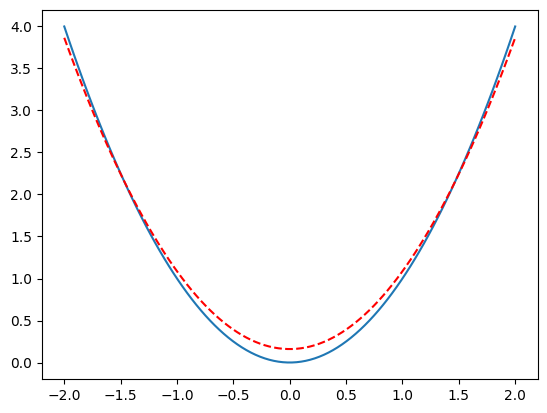

In [615]:
def soln(x): return w.detach().numpy()*x**2 + b.detach().numpy()
plt.plot(x, f(x))
plt.plot(x, soln(x), '--r')

### Pytorch and Regression

In [616]:
np.random.seed(11)
x = np.random.random_integers(low = 1, high = 30, size = 15)
y = 3*x + 4 + np.random.normal(size = len(x), scale = 3)

<ipython-input-616-75502d753c78>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 30 + 1) instead
  x = np.random.random_integers(low = 1, high = 30, size = 15)


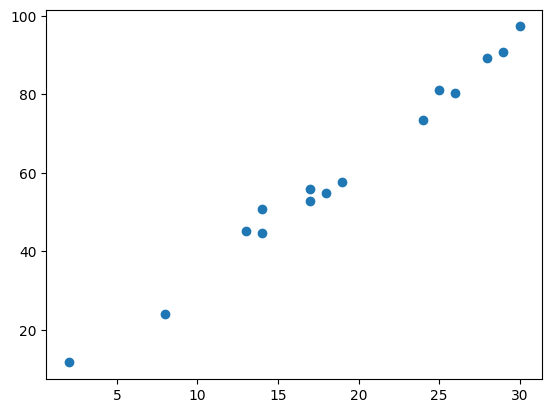

In [617]:
plt.scatter(x, y)

In [618]:
#rule 1 -- turn everything into a tensor
xt = torch.tensor(x, dtype = torch.float32)
yt = torch.tensor(y, dtype = torch.float32)

In [619]:
xt

tensor([26., 17., 28., 18., 24., 14., 13.,  2.,  8., 19., 25., 14., 29., 17.,
        30.])

In [620]:
yt

tensor([80.3901, 55.9462, 89.2632, 54.8032, 73.3413, 44.5728, 45.0690, 11.6836,
        24.0834, 57.6416, 81.2105, 50.7239, 90.9068, 52.9497, 97.2869])

In [621]:
### define the model
model = nn.Linear(in_features=1, out_features=1)

In [622]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2880]], requires_grad=True),
 Parameter containing:
 tensor([-0.1145], requires_grad=True)]

In [623]:
loss_fn = nn.MSELoss()

In [624]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [625]:
model(xt.reshape(-1, 1))

tensor([[-7.6035],
        [-5.0112],
        [-8.1796],
        [-5.2992],
        [-7.0275],
        [-4.1471],
        [-3.8590],
        [-0.6906],
        [-2.4188],
        [-5.5873],
        [-7.3155],
        [-4.1471],
        [-8.4676],
        [-5.0112],
        [-8.7557]], grad_fn=<AddmmBackward0>)

In [626]:
yhat = model(xt.reshape(-1, 1))

In [627]:
loss_fn(yt.reshape(-1, 1), yhat )

tensor(5064.9062, grad_fn=<MseLossBackward0>)

In [628]:
loss = loss_fn(yhat, yt.reshape(-1, 1))

In [629]:
loss.backward()

In [630]:
optimizer.step()

In [631]:
list(model.parameters())

[Parameter containing:
 tensor([[28.8443]], requires_grad=True),
 Parameter containing:
 tensor([1.2100], requires_grad=True)]

In [632]:
model = nn.Linear(in_features=1, out_features=1)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.1)

losses = []
for epoch in tqdm(range(100)):
  yhat = model(xt.reshape(-1, 1))
  loss = loss_fn( yhat, yt.reshape(-1, 1))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

100%|██████████| 100/100 [00:00<00:00, 1651.63it/s]


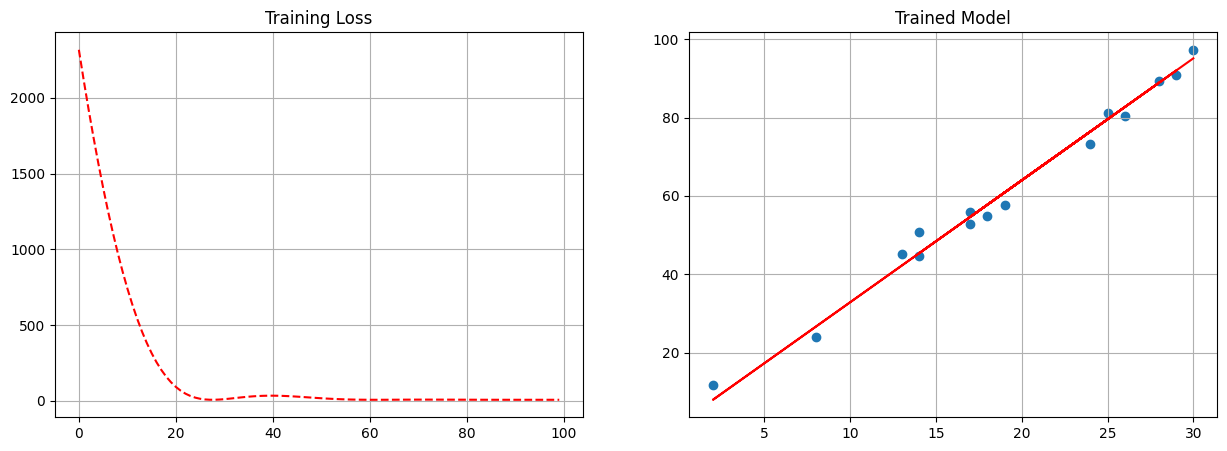

In [633]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(losses, '--r')
ax[0].set_title('Training Loss')
ax[0].grid();

ax[1].scatter(x, y)
ax[1].plot(x, model(xt.reshape(-1, 1)).detach().numpy(), '-r')
ax[1].set_title('Trained Model')
ax[1].grid();

In [634]:
import pandas as pd

### Binary Classification

Same process but we add a `Sigmoid` to the end of the network to interpret the output as probabilities.

Loss will use `BCELoss` or **Binary Cross Entropy** -- a measure associated with the quality of predictions in binary classification.

$$\text{BCE Loss} = -\frac{1}{n} \sum_{i = 1}^n y_i \log(p_i) + (1 - y_i)\log(1 - p_i)$$

In [635]:
from sklearn.datasets import make_blobs

In [636]:
### make a basic classification dataset
X, y = make_blobs(centers = 2, center_box=(-3, 3), random_state = 22)

In [637]:
X.shape

(100, 2)

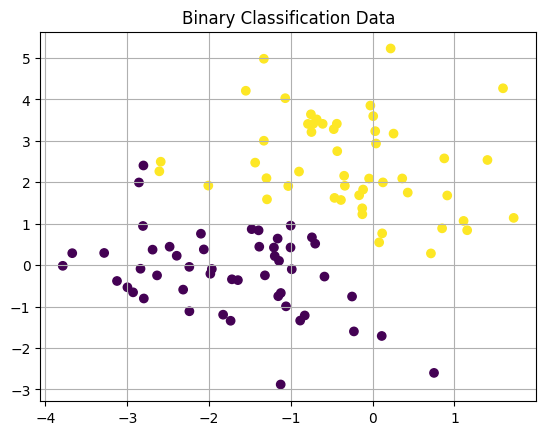

In [638]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.grid()
plt.title('Binary Classification Data');

In [639]:
model = nn.Sequential(nn.Linear(in_features=2, out_features=1), nn.Sigmoid())
# WE NEED BINARY CLASSIFICATION LOSS
loss = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [640]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

In [641]:
losses = []
for epoch in tqdm(range(100)):
  #make some predictions
  yhat = model(X)
  #evaluate the predictions
  loss_val = loss(yhat, y.unsqueeze(1))
  #use those predictions to update the parameters
  optimizer.zero_grad() #clearing out any prior gradient info
  loss_val.backward() #computes derivatives/gradients of loss function
  optimizer.step() #steps towards minimum values
  #keep track of how we are doing
  losses.append(loss_val.item())

100%|██████████| 100/100 [00:00<00:00, 2096.67it/s]


In [642]:
yhat.dtype

torch.float32

In [643]:
#the model returns probabilities
model(X)[:10]

tensor([[0.7954],
        [0.0077],
        [0.0995],
        [0.0091],
        [0.0183],
        [0.8861],
        [0.9653],
        [0.0081],
        [0.1589],
        [0.9119]], grad_fn=<SliceBackward0>)

In [644]:
torch.where(model(X) > 0.5, 1, 0).flatten()

tensor([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0])

In [645]:
y

tensor([1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 0.])

In [646]:
torch.where(model(X) > 0.5, 1, 0).flatten() == y

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [647]:
(torch.where(model(X) > 0.5, 1, 0).flatten() == y).sum()

tensor(99)

In [648]:
X.shape

torch.Size([100, 2])

In [649]:
yhat = torch.where(model(X) > 0, 1, 0)

In [650]:
yhat.shape

torch.Size([100, 1])

In [651]:
y == yhat.flatten()

tensor([ True, False, False, False, False,  True,  True, False, False,  True,
        False, False,  True, False, False,  True,  True,  True,  True,  True,
         True, False,  True, False, False,  True, False, False, False,  True,
         True,  True, False, False,  True, False,  True,  True, False, False,
        False, False,  True,  True, False, False,  True,  True,  True,  True,
        False,  True, False, False,  True, False,  True,  True,  True, False,
         True, False, False,  True, False, False,  True, False,  True, False,
        False, False,  True, False, False,  True, False, False,  True,  True,
         True,  True,  True,  True,  True, False, False,  True, False, False,
         True,  True,  True,  True, False, False,  True,  True, False, False])

### Image Classification

In [652]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [653]:
train = FashionMNIST(root = './data', train = True, download = True, transform = ToTensor())
test = FashionMNIST(root = './data', train = False, download = True, transform=ToTensor())

In [654]:
trainloader = DataLoader(train, batch_size = 10, shuffle = True)
testloader = DataLoader(test, batch_size = 10, shuffle = False)

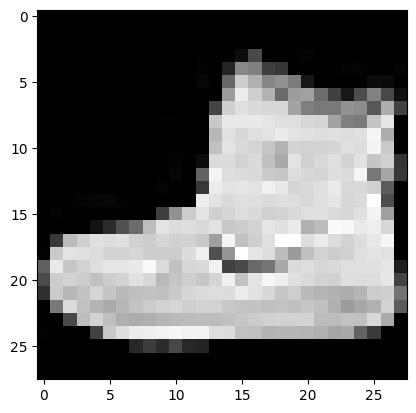

In [655]:
plt.imshow(train[0][0].squeeze(0), cmap = 'gray')

In [656]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [657]:
model = nn.Sequential(nn.Flatten(),
                      nn.Linear(in_features=28*28, out_features=10))
model = model.to(device)

In [658]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [659]:
device

device(type='cuda')

In [660]:
for epoch in tqdm(range(10)):
  for x, y in trainloader:
    x = x.to(device)
    y = y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████| 10/10 [02:11<00:00, 13.19s/it]


In [661]:
model(x).argmax(dim = 1)

tensor([7, 5, 4, 4, 3, 4, 8, 3, 7, 4], device='cuda:0')

In [662]:
y

tensor([7, 5, 4, 4, 3, 4, 8, 3, 7, 4], device='cuda:0')

In [663]:
(model(x).argmax(dim = 1) == y).sum()

tensor(10, device='cuda:0')

In [664]:
correct = 0
total = 0
for x, y in testloader:
    x = x.to(device)
    y = y.to(device)
    yhat = model(x)
    correct += (yhat.argmax(dim = 1) == y).sum()
    total += len(y)

In [665]:
print(f'Accuracy: {correct/total}')

Accuracy: 0.8136999607086182
